In [16]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Power Plants

In [17]:
fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"
ppl = pd.read_csv(fn, index_col=0)
ppl.head(2)

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Kernkraftwerk Emsland,Nuclear,Steam Turbine,PP,Germany,1336.0,0.33,1988.0,1988.0,2023.0,52.472897,7.32414,NaN,0.0,0.0,0.0,{nan},"{'MASTR': {'MASTR-SEE944567587799'}, 'ENTSOE':..."
1,Brokdorf,Nuclear,Steam Turbine,PP,Germany,1410.0,0.33,1986.0,1986.0,2021.0,53.850830,9.34472,NaN,0.0,0.0,0.0,{nan},"{'MASTR': {'MASTR-SEE951462745445'}, 'ENTSOE':..."


<Axes: xlabel='lon', ylabel='lat'>

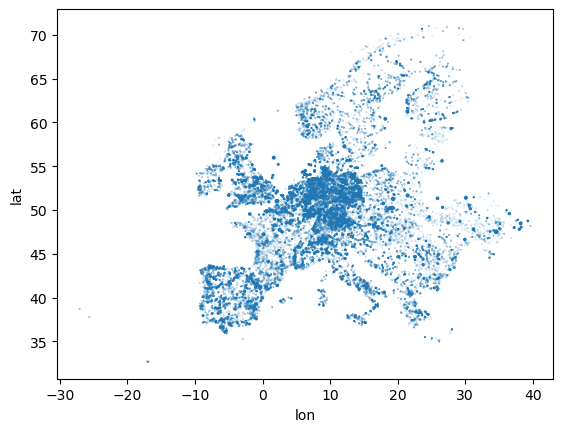

In [18]:
ppl.plot.scatter("lon", "lat", s=ppl.Capacity / 1e3)

In [19]:
ppl['geometry'] = ppl.apply(lambda x: Point(x['lon'], x['lat']), axis=1)
gdf = gpd.GeoDataFrame(ppl, geometry="geometry", crs=4326)

In [20]:
geometry = gpd.points_from_xy(ppl["lon"], ppl["lat"])
gdf = gpd.GeoDataFrame(ppl, geometry=geometry, crs=4326)

<Axes: >

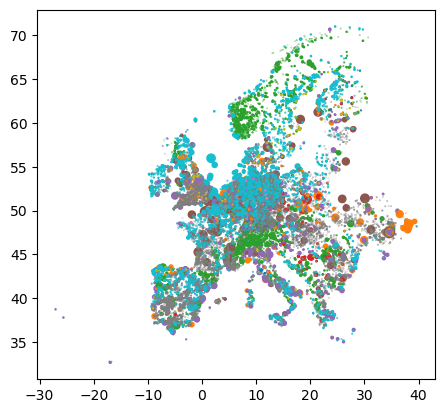

In [21]:
gdf.plot(
    column="Fueltype",
    markersize=gdf.Capacity / 1e2,
)

In [15]:
# Uses FOLIUM so it's interactive.

# gdf.explore(column='Fueltype')

# gdf.explore(
#     column="Fueltype",  # Column to color-code the map
#     cmap="viridis",    # Colormap
#     tiles="CartoDB positron",  # Basemap style
#     tooltip="name",  # Show country name on hover
#     popup=["name", "pop_est"],  # Show name and population in a pop-up
#     legend=True,  # Display a legend
#     scheme="quantiles",  # Color scale classification
# )

# Projections

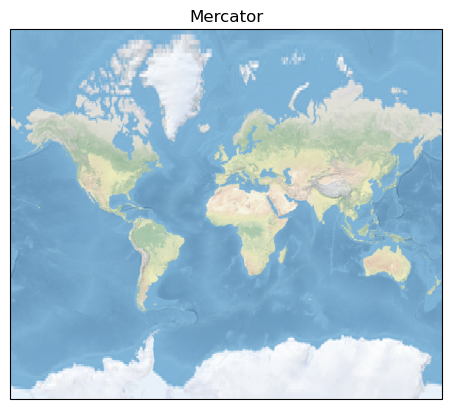

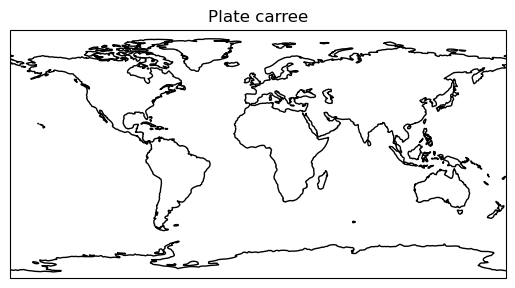

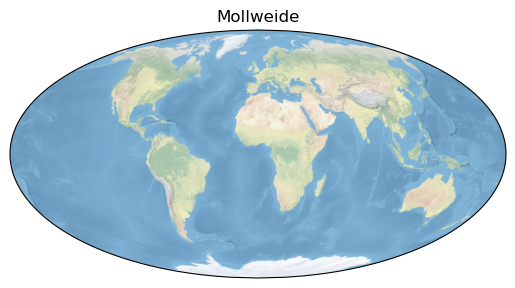

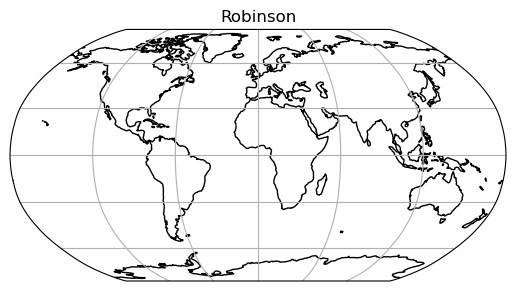

In [14]:
ax = plt.axes(projection=ccrs.Mercator())
ax.stock_img()
ax.set_title("Mercator")
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_title("Plate carree")
plt.show()

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.set_title("Mollweide")
plt.show()

ax = plt.axes(projection=ccrs.Robinson())
ax.gridlines()
ax.coastlines()
ax.set_title("Robinson")
plt.show()

# Plotting using cartopy

c:\Users\pablo.paredes\.conda\envs\pablo\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\pablo.paredes\.conda\envs\pablo\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


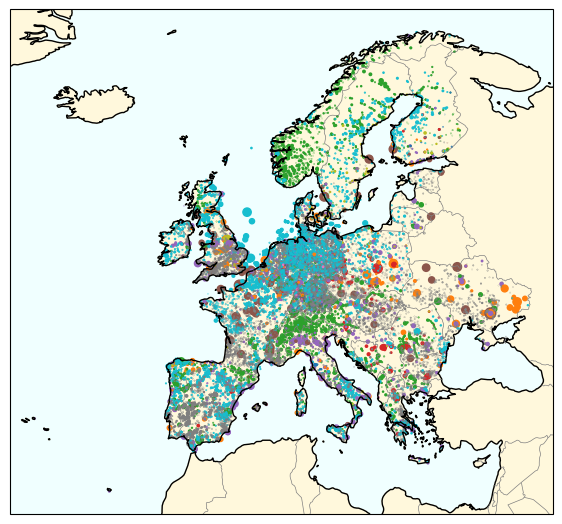

In [28]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, color="azure")
ax.add_feature(cartopy.feature.LAND, color="cornsilk")


gdf.plot(
    ax=ax,
    column='Fueltype',
    markersize=gdf.Capacity / 1e2
)

plt.show()

c:\Users\pablo.paredes\.conda\envs\pablo\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\pablo.paredes\.conda\envs\pablo\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


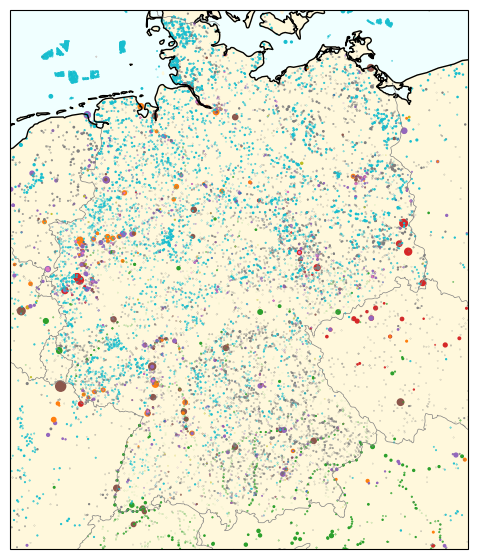

In [29]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, color="azure")
ax.add_feature(cartopy.feature.LAND, color="cornsilk")
ax.set_extent([5, 16, 47, 55])

gdf.plot(
    ax=ax,
    column='Fueltype',
    markersize=gdf.Capacity / 1e2
)

plt.show()

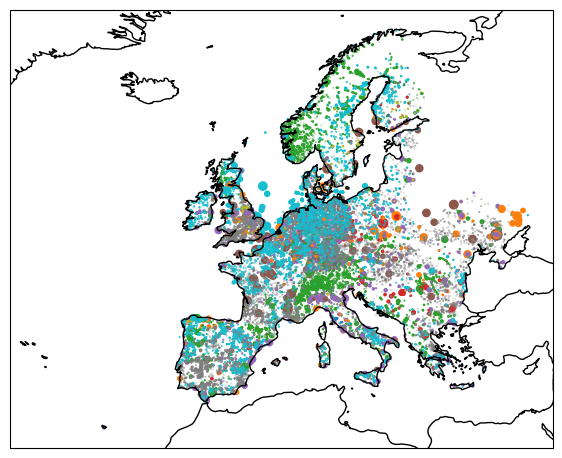

In [30]:
fig = plt.figure(figsize=(7, 7))

crs = ccrs.AlbersEqualArea()

ax = plt.axes(projection=crs)

gdf.to_crs(crs.proj4_init).plot(
    ax=ax,
    column="Fueltype",
    markersize=gdf.Capacity / 1e2,
)

ax.coastlines()

# NUTS Exploring (Countries' areas)

In [31]:
url = "https://tubcloud.tu-berlin.de/s/RHZJrN8Dnfn26nr/download/NUTS_RG_10M_2021_4326.geojson"
nuts = gpd.read_file(url)
nuts.head(3)

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,BG423,BG423,3,BG,Pazardzhik,Пазарджик,3.0,2,3,BG423,"POLYGON ((24.42101 42.55306, 24.41032 42.46950..."
1,BG424,BG424,3,BG,Smolyan,Смолян,3.0,3,3,BG424,"POLYGON ((25.07422 41.79348, 25.05851 41.75177..."
2,BG425,BG425,3,BG,Kardzhali,Кърджали,3.0,3,3,BG425,"POLYGON ((25.94863 41.32034, 25.90644 41.30757..."


In [32]:
nuts = nuts.set_index("id")
nuts.geometry

id
BG423    POLYGON ((24.42101 42.55306, 24.41032 42.46950...
BG424    POLYGON ((25.07422 41.79348, 25.05851 41.75177...
BG425    POLYGON ((25.94863 41.32034, 25.90644 41.30757...
CH011    MULTIPOLYGON (((6.86623 46.90929, 6.89621 46.9...
CH012    POLYGON ((8.47767 46.52760, 8.39953 46.48872, ...
                               ...                        
LV       POLYGON ((27.35158 57.51824, 27.54521 57.53444...
ME       POLYGON ((20.06394 43.00682, 20.32958 42.91149...
MK       POLYGON ((22.36021 42.31116, 22.51041 42.15516...
SK0      POLYGON ((19.88393 49.20418, 19.96275 49.23031...
IT       MULTIPOLYGON (((12.47792 46.67984, 12.69064 46...
Name: geometry, Length: 2010, dtype: geometry

In [33]:
nuts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
nuts.total_bounds

array([-63.08825, -21.38917,  55.83616,  80.76427])

In [35]:
nuts1 = nuts.query("LEVL_CODE == 1")

In [ ]:
# Folium
# nuts1.explore()

In [38]:
nuts1.to_file("tmp.geojson")

# Equal-area Projection for Europe EPSG:3035
## For calculating Areas and Buffers

In [39]:
nuts1 = nuts1.to_crs(3035)
area = nuts1.area / 1e6
area

id
AT1    23545.286205
AT2    25894.953057
EL4    17388.679384
EE0    45315.713593
EL3     3799.676547
           ...     
PL7    29846.398582
PL8    63217.536546
PL9    35563.812826
RO2    72545.290405
SK0    49008.115415
Length: 125, dtype: float64

In [ ]:
# Folium
# nuts1.explore(column=area, vmax=1e5)

In [ ]:
# Folium
## Buffer of 1 kilometer around each geometry:
# nuts1.buffer(1000).explore()

# Joining spatial datasets

## You need [sjoin()]:

- 2 geodataframes.
- Type of spatial relationship to test (intersects, contains, within...)
- Type of join (inner, left, right)

In [42]:
gdf = gdf.to_crs(3035)

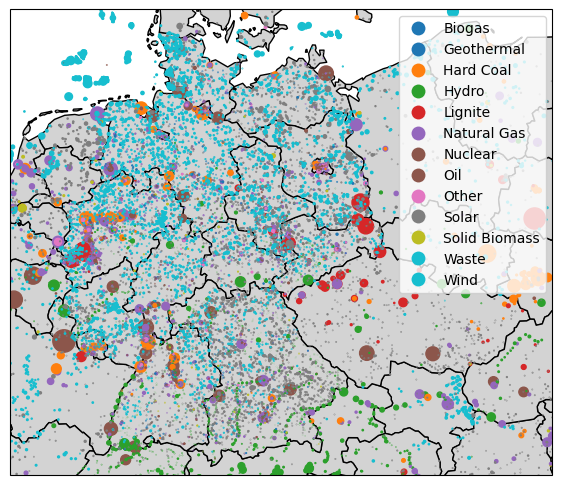

In [43]:
fig = plt.figure(figsize=(7, 7))

ax = plt.axes(projection=ccrs.epsg(3035))

nuts1.plot(ax=ax, edgecolor="black", facecolor="lightgrey")

gdf.plot(ax=ax, column="Fueltype", markersize=gdf.Capacity / 20, legend=True)

ax.set_extent([5, 19, 47, 55])

In [51]:
joined = gdf.sjoin(nuts1) # What items in GDF are within which items in nuts1
joined.head(3)

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID,geometry,index_right,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Kernkraftwerk Emsland,Nuclear,Steam Turbine,PP,Germany,1336.0,0.33,1988.0,1988.0,2023.0,52.472897,7.324140,NaN,0.0,0.0,0.0,{nan},"{'MASTR': {'MASTR-SEE944567587799'}, 'ENTSOE':...",POINT (4139214.223 3265962.274),DE9,DE9,1,DE,Niedersachsen,Niedersachsen,0.0,0,0,DE9
35,Pumpspeicherkraftwerk Erzhausen,Hydro,Pumped Storage,Store,Germany,200.0,0.75,1964.0,1998.0,NaN,51.898567,9.924888,4.681818,0.0,0.0,0.0,{nan},"{'MASTR': {'MASTR-SEE958882764216'}, 'ENTSOE':...",POINT (4315829.815 3198716.570),DE9,DE9,1,DE,Niedersachsen,Niedersachsen,0.0,0,0,DE9
110,Grohnde,Nuclear,Steam Turbine,PP,Germany,1360.0,0.33,1984.0,1985.0,2021.0,52.035200,9.413333,NaN,0.0,0.0,0.0,{nan},"{'MASTR': {'MASTR-SEE930752846949'}, 'ENTSOE':...",POINT (4280740.958 3214078.646),DE9,DE9,1,DE,Niedersachsen,Niedersachsen,0.0,0,0,DE9


In [47]:
cap = joined.groupby("NUTS_ID").Capacity.sum() / 1000  # GW
cap

NUTS_ID
AL0     2.272400
AT1     7.804600
AT2     6.248500
AT3    11.114933
BE1     0.063000
         ...    
UKJ    10.176600
UKK     6.101800
UKL    11.456075
UKM    15.753600
UKN     2.206800
Name: Capacity, Length: 106, dtype: float64

In [48]:
nuts1.index.difference(cap.index)

Index(['CY0', 'ES7', 'FI2', 'FRY', 'IS0', 'LI0', 'MT0', 'TR1', 'TR2', 'TR3',
       'TR4', 'TR5', 'TR6', 'TR7', 'TR8', 'TR9', 'TRA', 'TRB', 'TRC'],
      dtype='object')

In [49]:
cap = cap.reindex(nuts1.index)
cap

id
AT1    7.804600
AT2    6.248500
EL4    1.158800
EE0    3.269400
EL3    1.547600
         ...   
PL7    8.170224
PL8    2.719151
PL9    8.804688
RO2    5.840866
SK0    6.720587
Name: Capacity, Length: 125, dtype: float64

<Axes: >

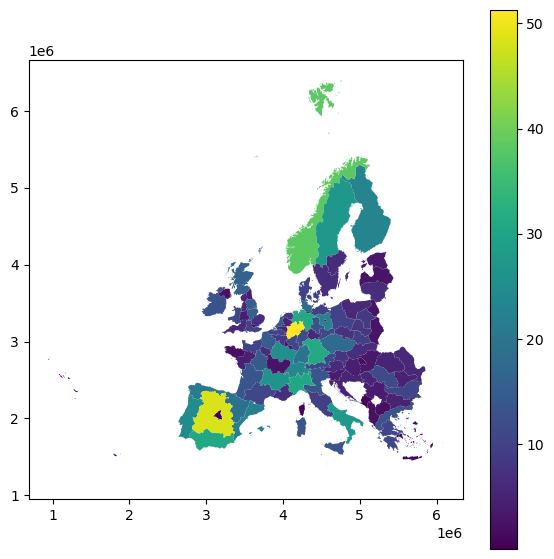

In [52]:
nuts1.plot(figsize=(7, 7), column=cap, legend=True)

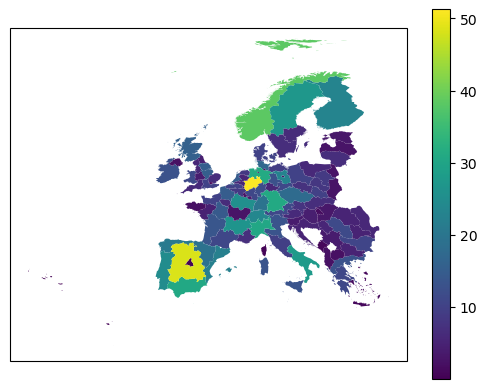

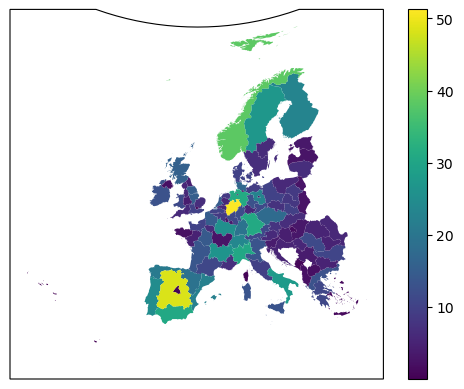

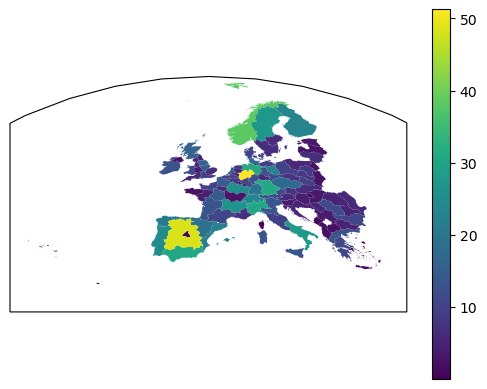

In [55]:
for crs in [ccrs.EqualEarth(), ccrs.AlbersEqualArea(), ccrs.Orthographic()]:
    fig = plt.figure()
    ax = plt.axes(projection=crs)
    nuts1.to_crs(crs.proj4_init).plot(ax=ax, column=cap, legend=True)
    plt.show()

<Axes: >

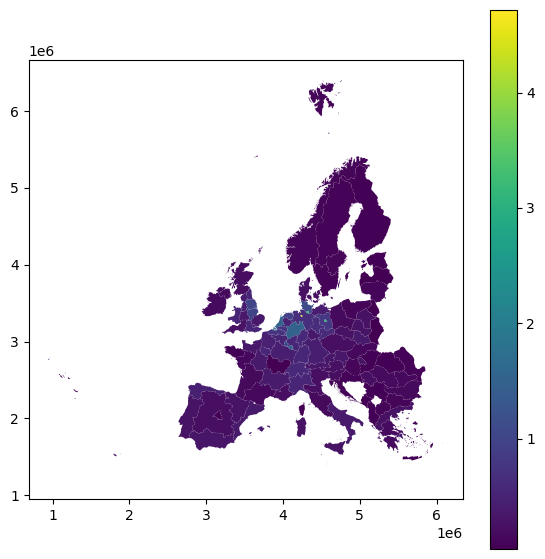

In [56]:
nuts1.plot(figsize=(7, 7), column=cap / (nuts1.area / 1e9), legend=True)

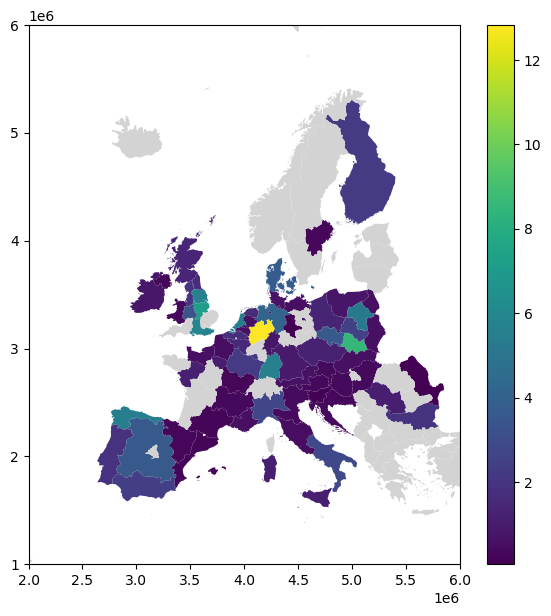

In [57]:
hard_coal_cap = (
    joined.query("Fueltype == 'Hard Coal'")
    .groupby("NUTS_ID")
    .Capacity.sum()
    .reindex(nuts1.index)
    .div(1e3)
)
nuts1.plot(
    figsize=(7, 7),
    column=hard_coal_cap,
    legend=True,
    missing_kwds=dict(color="lightgrey"),
)
plt.ylim(1e6, 6e6)
plt.xlim(2e6, 6e6);

<Axes: >

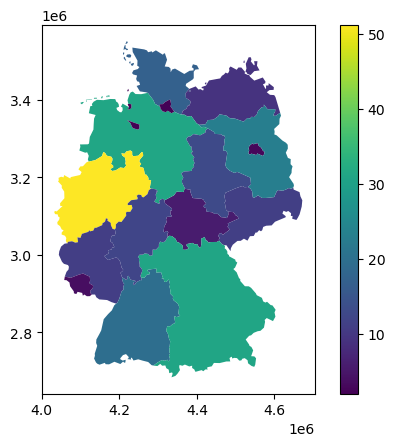

In [58]:
subregion = nuts1.query("CNTR_CODE == 'DE'")
subregion.plot(column=cap.reindex(subregion.index), legend=True)

<Axes: >

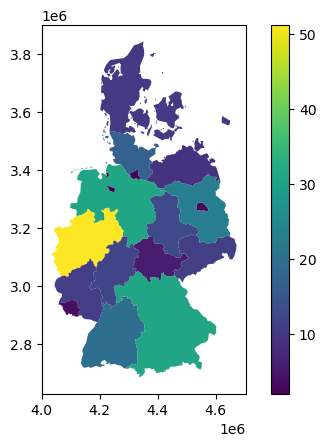

In [59]:
countries = ["DE", "DK"]
subregion = nuts1.query("CNTR_CODE in @countries")  # alternative A
subregion = nuts1.loc[nuts1.CNTR_CODE.isin(countries)]  # alternative B
subregion.plot(column=cap.reindex(subregion.index), legend=True)

<Axes: >

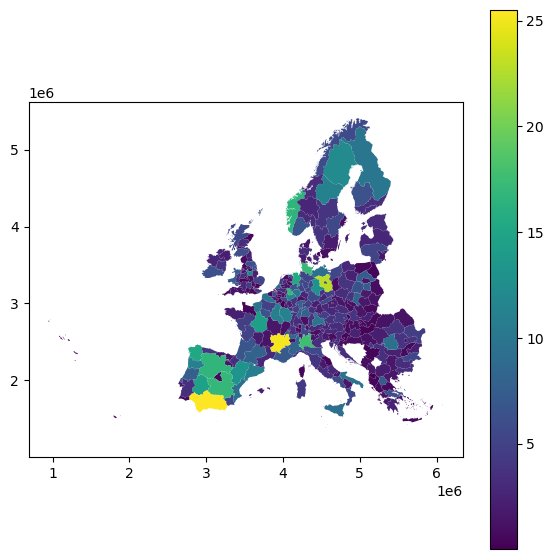

In [60]:
nuts2 = nuts.query("LEVL_CODE == 2").to_crs(3035)
joined2 = gdf.sjoin(nuts2)
cap2 = joined2.groupby("NUTS_ID").Capacity.sum().reindex(nuts2.index).div(1000)  # GW
nuts2.plot(figsize=(7, 7), column=cap2, legend=True)

C:\Users\pablo.paredes\AppData\Local\Temp\ipykernel_25104\2672635237.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


<Axes: >

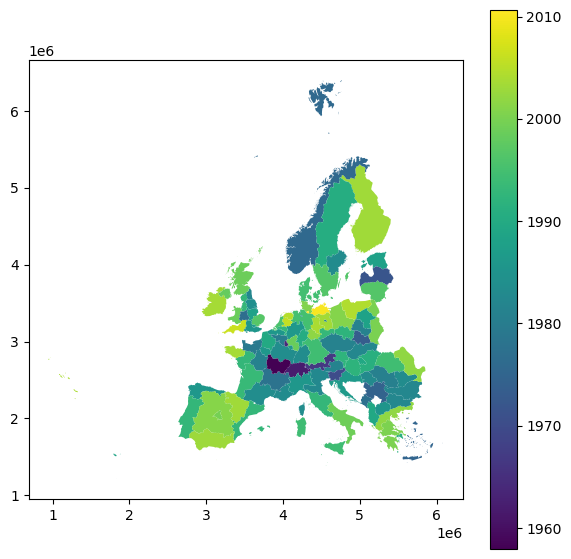

In [61]:
def calculate_weighted_age(x):
    """
    Formula:
    \bar{x} = \frac{ \sum\limits_{i=1}^n w_i x_i}{\sum\limits_{i=1}^n w_i}
    """

    numerator = (x.Capacity * x.DateIn).sum()

    # only build sum of capacities where a date is given
    denominator = x.Capacity.where(~x.DateIn.isna()).sum()

    return numerator / denominator


age = joined.groupby("NUTS_ID").apply(calculate_weighted_age).reindex(nuts1.index)

nuts1.plot(figsize=(7, 7), column=age, legend=True)

<Axes: >

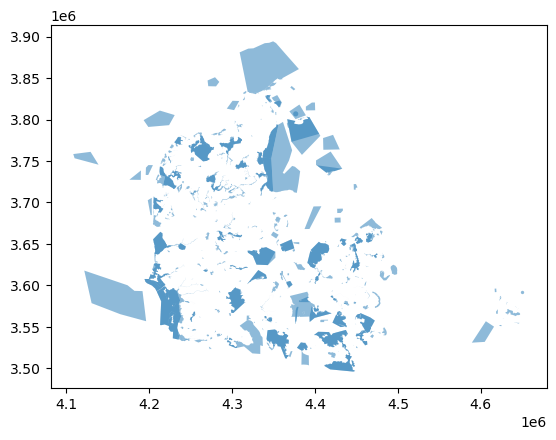

In [62]:
url = "https://tubcloud.tu-berlin.de/s/mEpdmgBtmMbyjAr/download/Natura2000_end2021-DK.gpkg"
natura = gpd.read_file(url)
natura.plot(alpha=0.5)

In [64]:
natura.head()

,SITECODE,SITENAME,MS,SITETYPE,INSPIRE_ID,geometry
0,DK008X073,Vresen og havet mellem Fyn og Langeland,DK,A,Dk.nst.ps.SPA73,"POLYGON ((4375964.317 3556167.012, 4376666.388..."
1,DK006X261,Oreby skov,DK,B,Dk.nst.ps.SAC180,"POLYGON ((4435874.060 3549809.539, 4435886.625..."
2,DK008X192,Søer ved Tårup og Klintholm,DK,B,Dk.nst.ps.SAC102,"MULTIPOLYGON (((4372048.522 3564913.470, 43719..."
3,DK009X181,Sølsted Mose,DK,B,Dk.nst.ps.SAC89,"POLYGON ((4247130.310 3547253.019, 4247185.612..."
4,DK00DX150,Tved Kær,DK,B,Dk.nst.ps.SAC46,"POLYGON ((4349220.168 3677334.863, 4349195.843..."


In [63]:
natura.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [ ]:
# Folium showing the protected areas in Denmark

# total = natura.dissolve()
# onshore_natura = gpd.overlay(nuts1.dissolve(), total)
# onshore_natura.explore()